In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.rcParams['font.sans-serif'] = ["PingFang SC"]
plt.rcParams["figure.figsize"] = (10, 10)

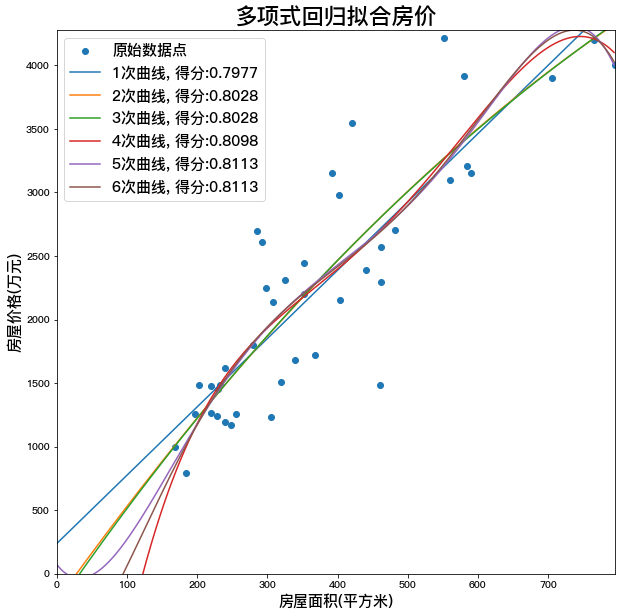

In [16]:
def ploy(arr, p):
    res = np.array([np.power(arr, i) for i in np.arange(1, p+1)])
    return np.vstack(res).T


def ployFit(x, y, maxp):
    ps = np.arange(1, maxp)

    x_hat = np.arange(0, x.max())
    y_hat = []
    scores = []
    for p in ps:
        # 构造多项式参数
        X = ploy(x, p)
        # 拟合模型
        mod = linear_model.LinearRegression()
        mod.fit(X, y)
        # 生成预测曲线
        X_hat = ploy(x_hat, p)
        y_hat.append(mod.predict(X_hat))
        scores.append(mod.score(X, price))

    plt.scatter(x, y)
    for y in y_hat:
        plt.plot(x_hat, y)

    fontsize = 15
    plt.title("多项式回归拟合房价", fontsize=fontsize*1.5)
    plt.xlabel("房屋面积(平方米)", fontsize=fontsize)
    plt.ylabel("房屋价格(万元)", fontsize=fontsize)
    plt.legend(["原始数据点"]+["{}次曲线, 得分:{:.4}".format(p, s)
               for p, s in zip(ps, scores)], fontsize=fontsize)
    plt.xlim([0, x.max()])
    plt.ylim([0, y.max()])
    plt.show()


# 读取数据
data = pd.read_csv("data/prices.txt")
price = np.array(data.iloc[:, 0])
size = np.array(data.iloc[:, 1])
ployFit(size, price, 7)
